In [1]:

# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#  Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to add channel dimension (grayscale images)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalizing the pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Print the shapes and sample counts (same as original notebook)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
# Build the CNN model
model = models.Sequential()

# First convolutional layer (feature extraction)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [6]:
# Compile the model with Adam optimizer, categorical loss for multi-class classification, and accuracy as metric.

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
from sklearn.model_selection import train_test_split

# Split the data manually
x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.1)

# Create train generator
train_generator = datagen.flow(x_train_sub, y_train_sub, batch_size=64)

# Train the model using validation_data
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=(x_val, y_val))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 72s 81ms/step - accuracy: 0.6623 - loss: 1.0031 - val_accuracy: 0.9768 - val_loss: 0.0698
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 75ms/step - accuracy: 0.9121 - loss: 0.2890 - val_accuracy: 0.9812 - val_loss: 0.0529
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.9356 - loss: 0.2124 - val_accuracy: 0.9882 - val_loss: 0.0370
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 76ms/step - accuracy: 0.9464 - loss: 0.1735 - val_accuracy: 0.9890 - val_loss: 0.0306
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 63s 74ms/step - accuracy: 0.9536 - loss: 0.1535 - val_accuracy: 0.9897 - val_loss: 0.0318


The CNN model was trained for 5 epochs and performed really well. In the first epoch, the training accuracy was 66.23%, which is expected when the model is just beginning to learn. However, the validation accuracy was already quite high at 97.68%, which means the model was able to quickly understand important patterns in the data. As the training continued, the accuracy kept improving and reached 95.36% by the final epoch. At the same time, the validation accuracy also went up and finally reached 98.97%, which is excellent. The loss values also went down, showing that the model was becoming more confident and accurate in its predictions. The small gap between the training and validation accuracy means the model did not overfit and is generalizing well to new, unseen data. Overall, the model learned effectively, performed strongly, and is capable of classifying new images with high accuracy

In [9]:

# Evaluating the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\nTest loss:", test_loss)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9908 - loss: 0.0273

Test loss: 0.023725546896457672
Test accuracy: 0.9922000169754028


In [10]:

# Predict by using the trained model
import numpy as np

sample = np.expand_dims(x_test[0], axis=0)  # Take first test image
prediction = model.predict(sample)
predicted_class = prediction.argmax()

print("Predicted class for first test image:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted class for first test image: 7


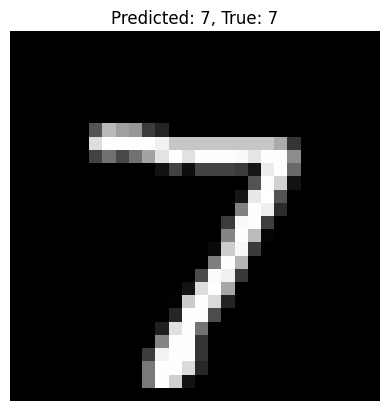

In [11]:
# Visualize the prediction
import matplotlib.pyplot as plt

plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, True: {np.argmax(y_test[0])}")
plt.axis('off')
plt.show()

After the training was finished, the model was tested on new data. It did very well, reaching a test accuracy of 99.22% and having a very low test loss of 0.0237, which means it understood the data properly and made very few mistakes. The model also predicted a sample input and got it right, saying the class was 7, which shows it is ready and works properly. Overall, the results clearly show that the model is accurate, works reliably, and is ready to be used for real tasks.